## Checklist
*Fill this table appropriately as you progress in your tasks:*

| | |
|-|-|
|**Section 1 -  Completed**|
|**1.1** | **Completed**|
|1.1.1 | Completed|
|1.1.2 | Completed|
| | |
|**1.2** | **Completed**|
|1.2.1 | Completed|
|1.2.2 | Completed|
| | |
|**Presentation - Completed**|
| | |
|**Section 2 - Completed**|
|2.1 | Completed|
|2.2 | Completed|

---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Section 1

## 1.1 Funnel Analysis

## 1.1.1 Descriptive Analysis and EDA

In [2]:
import pandas as pd

file_path = '/content/gdrive/MyDrive/Fittlyf/AssignmentData.xlsx'
sheet_name = 'Funnel'

# Read the Funnel sheet into a pandas DataFrame named funnel
funnel = pd.read_excel(file_path, sheet_name=sheet_name)
print(funnel)


      Year  Month    Segment     City           KPI         Value
0     2021      1    Clients  Unknown  Lv1_Visitors  3.071671e+06
1     2021      1    Clients  Unknown  Lv2_Visitors  2.699883e+06
2     2021      1    Clients  Unknown  Lv3_Visitors  1.309450e+06
3     2021      1    Clients  Unknown  Lv4_Visitors           NaN
4     2021      1    Clients  Unknown  Lv3_Visitors  7.169216e+05
...    ...    ...        ...      ...           ...           ...
1567  2023      2  Customers     Pune  Lv5_Visitors  1.220231e+04
1568  2023      2  Customers    Kochi  Lv4_Visitors  1.124870e+04
1569  2023      2  Customers   Jaipur  Lv5_Visitors  1.188202e+04
1570  2023      2  Customers      NCR  Lv5_Visitors  1.016909e+04
1571  2023      2  Customers    Kochi  Lv5_Visitors  1.077807e+04

[1572 rows x 6 columns]


**1. Identify and appropriately handle the missing values in the dataset. Perform missing value imputation and explain the logic behind your strategy in a short paragraph.**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mno
import warnings
warnings.filterwarnings('ignore')

In [4]:
funnel.isnull().sum()

Year        0
Month       0
Segment     0
City        0
KPI         0
Value      31
dtype: int64

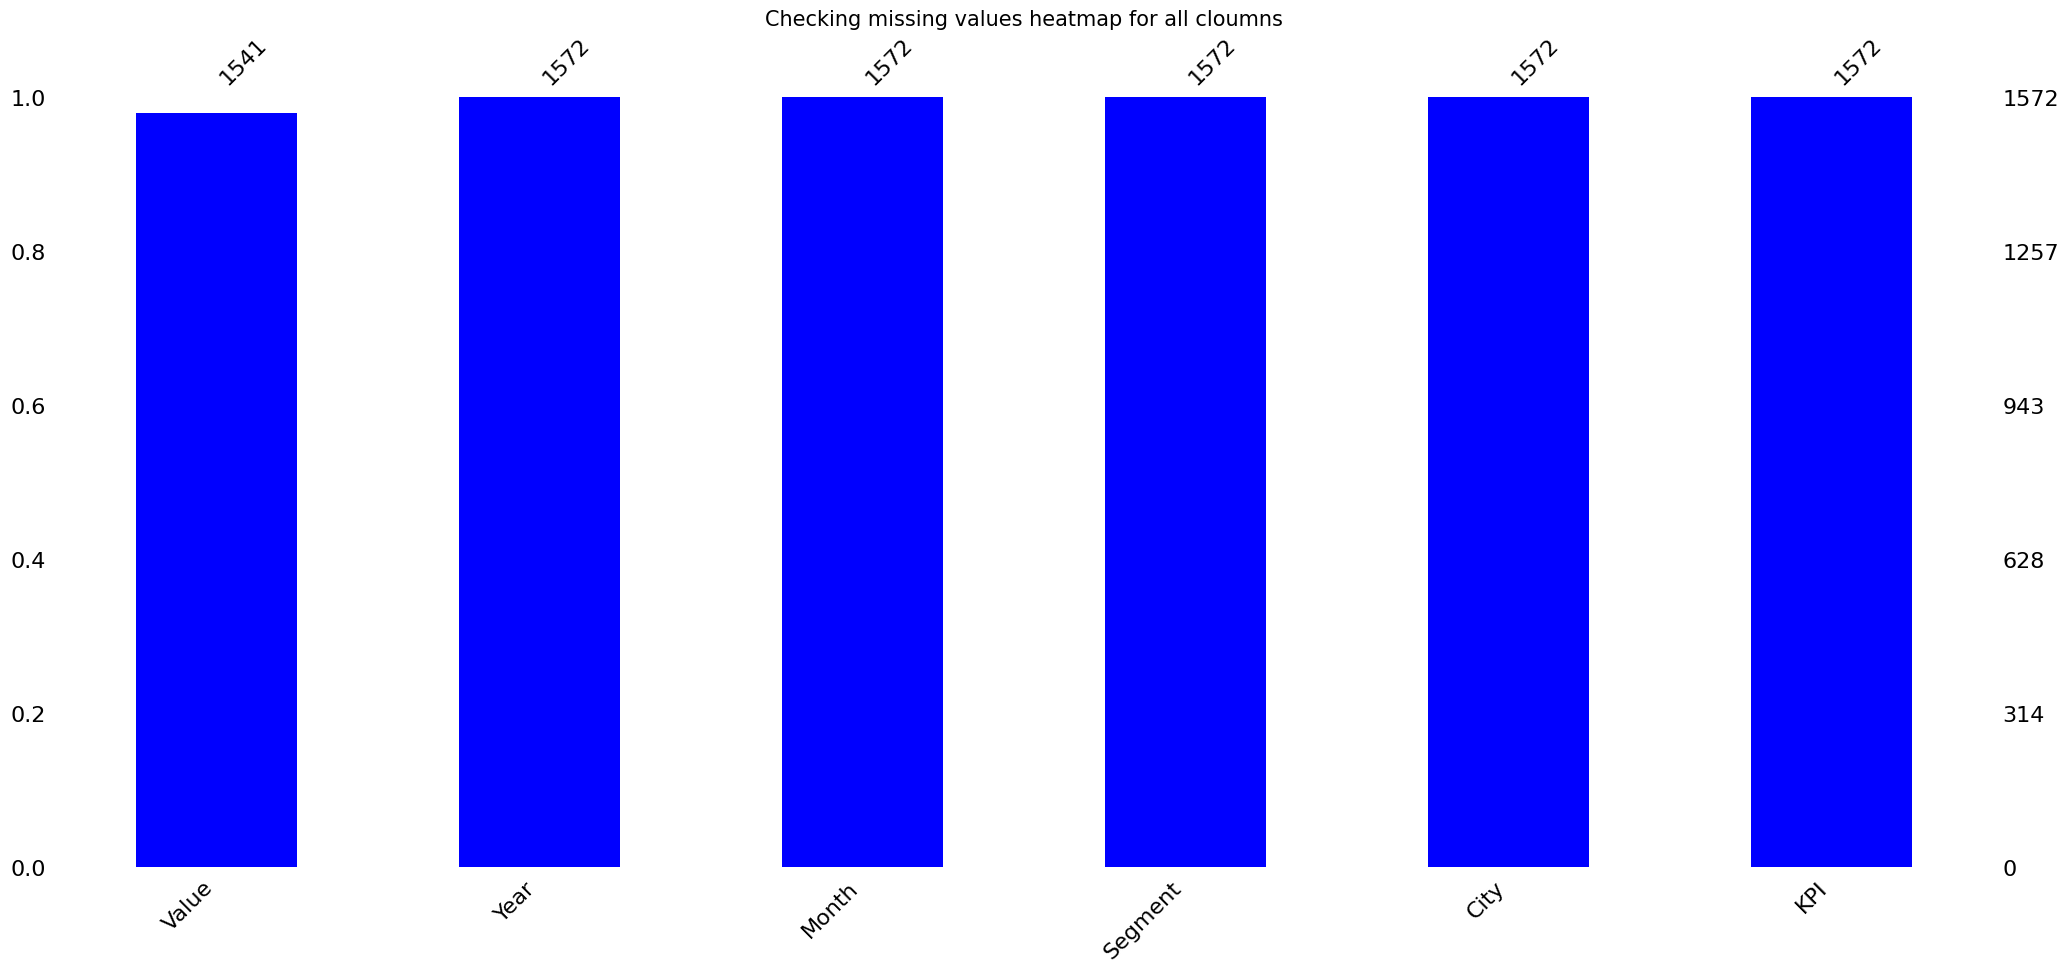

In [5]:
mno.bar(funnel.iloc[:, :6],
        color='blue',
        sort='ascending')
plt.title("Checking missing values heatmap for all cloumns", fontsize=15)
plt.show()

**There are few missing values in column Value. Nearly only 2% Data of Value column is missing, from 1572 only 31 values of that column is missing**

**Imputation by KPI Category:**

Consider imputing missing values based on the corresponding "KPI" category. For each missing value, replace it with the mean or median of the observed values for that specific "KPI" category. This approach helps retain the relationship between the "Value" column and the "KPI" categories.

In [6]:
funnel['Value'] = funnel.groupby('KPI')['Value'].transform(lambda x: x.fillna(x.mean()))

In [7]:
funnel.isnull().sum()

Year       0
Month      0
Segment    0
City       0
KPI        0
Value      0
dtype: int64

*Now we can see no missing values, and all the 31 Value column missing values are filled by the Imputation by KPI Category technique which we have used.*

**The main reason of using Imputation by KPI Category was Value is based on the type of persons visiting the website. So, It could be better to fill those values based on the KPI Category itself**

**2. Perform complete descriptive analysis of the dataframe. Create two dataframes with columns having multi-level index, the first level index will be Segment, Cityand KPI, and the second level index will be unique values of each of the first level indeces.**

**The first dataframe will have monthly summarization of the value (use sum/mean as you find appropriate)
The second dataframe will have quaterly summarization of the value.
Describe your findings in a paragraph.**

In [8]:
# Perform descriptive analysis
descriptive_stats = funnel.describe()
descriptive_stats

,Year,Month,Value
count,1572.000000,1572.000000,1.572000e+03
mean,2022.129771,6.500000,2.774676e+05
std,0.832781,3.453151,6.381451e+05
min,2021.000000,1.000000,8.826801e+03
25%,2021.000000,3.750000,1.965320e+04
50%,2022.000000,6.500000,4.395835e+04
75%,2023.000000,9.250000,1.952091e+05
max,2023.000000,12.000000,4.712305e+06


In [9]:
# Convert 'Year' and 'Month' to datetime
funnel['Date'] = pd.to_datetime(funnel['Year'].astype(str) + '-' + funnel['Month'].astype(str))

# Create two DataFrames with multi-level indices
monthly_summary = funnel.groupby(['Segment', 'City', 'KPI', pd.Grouper(key='Date', freq='M')])['Value'].sum().unstack(level=[2, 3])
quarterly_summary = funnel.groupby(['Segment', 'City', 'KPI', pd.Grouper(key='Date', freq='Q')])['Value'].sum().unstack(level=[2, 3])

print("\nMonthly Summary:")
print(monthly_summary)



Monthly Summary:
KPI                Lv1_Visitors                                            \
Date                 2023-01-31    2023-02-28    2023-03-31    2023-04-30   
Segment   City                                                              
Clients   Chennai  1.309070e+05  1.578957e+05  1.385292e+05  1.265185e+05   
          Jaipur   1.886650e+05  1.803073e+05  1.681754e+05  1.669780e+05   
          Lucknow  6.400621e+05  7.907234e+05  7.552656e+05  7.466221e+05   
          Pune     2.509714e+05  3.052856e+05  2.720470e+05  2.492667e+05   
          Unknown  3.232931e+06  3.766043e+06  3.332401e+06  3.451076e+06   
Customers Jaipur   2.702308e+04  3.695097e+04  3.691915e+04  4.178758e+04   
          Kochi    1.701537e+04  1.694692e+04  1.746835e+04  1.768970e+04   
          Lucknow  9.244834e+04  1.155949e+05  1.106335e+05  1.163673e+05   
          NCR      5.441456e+04  3.039331e+04  2.933129e+04  5.357145e+04   
          Pune     3.795602e+04  3.933288e+04  4.118291e+0

In [10]:
quarterly_summary

KPI                Lv1_Visitors                                            \
Date                 2023-03-31    2023-06-30    2023-09-30    2023-12-31   
Segment   City                                                              
Clients   Chennai  4.273319e+05  3.782287e+05  3.837572e+05  4.178473e+05   
          Jaipur   5.371476e+05  5.085141e+05  5.939943e+05  6.170397e+05   
          Lucknow  2.186051e+06  2.203240e+06  2.099976e+06  2.055755e+06   
          Pune     8.283040e+05  7.805272e+05  8.222971e+05  8.688391e+05   
          Unknown  1.033138e+07  9.903780e+06  1.019247e+07  1.027593e+07   
Customers Jaipur   1.008932e+05  1.147199e+05  9.791534e+04  9.499712e+04   
          Kochi    5.143064e+04  4.887737e+04  4.906503e+04  4.832990e+04   
          Lucknow  3.186767e+05  3.255409e+05  3.209220e+05  2.625348e+05   
          NCR      1.141392e+05  1.247821e+05  1.210659e+05  1.589793e+05   
          Pune     1.184718e+05  1.297201e+05  1.343999e+05  9.191776e+04   
          Unknown  1.301790e+06  1.584524e+06  1.459405e+06  1.325752e+06   

KPI                Lv2_Visitors                                            \
Date                 2023-03-31    2023-06-30    2023-09-30    2023-12-31   
Segment   City                                                              
Clients   Chennai  2.620813e+05  2.280364e+05  5.436321e+05  2.593837e+05   
          Jaipur   3.350577e+05  3.185456e+05  3.968874e+05  4.010271e+05   
          Lucknow  1.316552e+06  1.331801e+06  1.204877e+06  1.229218e+06   
          Pune     4.942786e+05  4.597734e+05  5.122232e+05  5.346251e+05   
          Unknown  6.588417e+06  6.176866e+06  6.485064e+06  6.505222e+06   
Customers Jaipur   7.426386e+04  7.812485e+04  7.563905e+04  6.998779e+04   
          Kochi    4.410965e+04  4.479610e+04  4.440725e+04  4.529735e+04   
          Lucknow  1.921567e+05  1.998423e+05  1.916261e+05  1.856678e+05   
          NCR      8.724799e+04  9.386779e+04  9.336275e+04  1.207137e+05   
          Pune     8.665220e+04  8.989726e+04  9.839967e+04  7.089059e+04   
          Unknown  8.988288e+05  1.104036e+06  9.952159e+05  9.623516e+05   

KPI                Lv3_Visitors                ...  Lv4_Visitors  \
Date                 2023-03-31    2023-06-30  ...    2022-09-30   
Segment   City                                 ...                 
Clients   Chennai  2.311440e+05  2.010300e+05  ...           NaN   
          Jaipur   4.771108e+05  2.578054e+05  ...           NaN   
          Lucknow  1.136051e+06  1.072448e+06  ...           NaN   
          Pune     4.160377e+05  3.439816e+05  ...           NaN   
          Unknown  5.387215e+06  4.703878e+06  ...  1.739909e+06   
Customers Jaipur   5.819142e+04  5.936414e+04  ...  4.610642e+04   
          Kochi    4.154993e+04  3.697566e+04  ...  3.760839e+04   
          Lucknow  1.689100e+05  1.546603e+05  ...  1.074342e+05   
          NCR      6.897538e+04  8.071339e+04  ...  6.113573e+04   
          Pune     6.350732e+04  5.800826e+04  ...  4.324678e+04   
          Unknown  7.012703e+05  7.049335e+05  ...  5.304698e+05   

KPI                              Lv5_Visitors                              \
Date                 2022-12-31    2021-03-31    2021-06-30    2021-09-30   
Segment   City                                                              
Clients   Chennai           NaN           NaN           NaN           NaN   
          Jaipur            NaN           NaN           NaN           NaN   
          Lucknow           NaN           NaN           NaN           NaN   
          Pune              NaN           NaN           NaN           NaN   
          Unknown  2.438528e+06  1.075312e+06  1.529238e+06  1.082526e+06   
Customers Jaipur   1.637892e+05  3.990930e+04  4.353107e+04  4.454445e+04   
          Kochi    1.610356e+05  3.257789e+04  3.458253e+04  3.319491e+04   
          Lucknow  9.414459e+04  7.587332e+04  9.268294e+04  7.346211e+04   
          NCR      1.715439e+05  4.145701e

In [11]:
monthly_summary

KPI                Lv1_Visitors                                            \
Date                 2023-01-31    2023-02-28    2023-03-31    2023-04-30   
Segment   City                                                              
Clients   Chennai  1.309070e+05  1.578957e+05  1.385292e+05  1.265185e+05   
          Jaipur   1.886650e+05  1.803073e+05  1.681754e+05  1.669780e+05   
          Lucknow  6.400621e+05  7.907234e+05  7.552656e+05  7.466221e+05   
          Pune     2.509714e+05  3.052856e+05  2.720470e+05  2.492667e+05   
          Unknown  3.232931e+06  3.766043e+06  3.332401e+06  3.451076e+06   
Customers Jaipur   2.702308e+04  3.695097e+04  3.691915e+04  4.178758e+04   
          Kochi    1.701537e+04  1.694692e+04  1.746835e+04  1.768970e+04   
          Lucknow  9.244834e+04  1.155949e+05  1.106335e+05  1.163673e+05   
          NCR      5.441456e+04  3.039331e+04  2.933129e+04  5.357145e+04   
          Pune     3.795602e+04  3.933288e+04  4.118291e+04  4.839860e+04   
          Unknown  4.205596e+05  4.589002e+05  4.223303e+05  5.871890e+05   

KPI                                                                        \
Date                 2023-05-31    2023-06-30    2023-07-31    2023-08-31   
Segment   City                                                              
Clients   Chennai  1.223555e+05  1.293546e+05  1.319118e+05  1.254190e+05   
          Jaipur   1.626434e+05  1.788927e+05  1.900423e+05  2.040746e+05   
          Lucknow  7.378211e+05  7.187968e+05  6.871919e+05  7.235810e+05   
          Pune     2.478874e+05  2.833731e+05  2.815073e+05  2.718700e+05   
          Unknown  3.141762e+06  3.310942e+06  3.305374e+06  3.517931e+06   
Customers Jaipur   3.220066e+04  4.073161e+04  3.954136e+04  3.003684e+04   
          Kochi    1.428826e+04  1.689941e+04  1.622933e+04  1.738937e+04   
          Lucknow  1.074124e+05  1.017611e+05  1.299540e+05  9.793925e+04   
          NCR      3.436868e+04  3.684200e+04  3.642032e+04  3.717561e+04   
          Pune     3.299283e+04  4.832871e+04  4.691546e+04  5.137207e+04   
          Unknown  4.825097e+05  5.148248e+05  5.165138e+05  4.756637e+05   

KPI                                            ...   Lv5_Visitors  \
Date                 2023-09-30    2023-10-31  ...     2022-03-31   
Segment   City                                 ...                  
Clients   Chennai  1.264264e+05  1.314972e+05  ...            NaN   
          Jaipur   1.998773e+05  2.006091e+05  ...            NaN   
          Lucknow  6.892027e+05  6.456754e+05  ...            NaN   
          Pune     2.689198e+05  2.698625e+05  ...            NaN   
          Unknown  3.369162e+06  3.321884e+06  ...  281369.501209   
Customers Jaipur   2.833713e+04  3.060410e+04  ...   16147.088205   
          Kochi    1.544634e+04  1.528924e+04  ...   12361.622080   
          Lucknow  9.302875e+04  8.056413e+04  ...   25775.017709   
          NCR      4.747000e+04  5.234241e+04  ...   15839.988971   
          Pune     3.611235e+04  3.032794e+04  ...   15296.652580   
          Unknown  4.672273e+05  4.388080e+05  ...   83615.705548   

KPI                                                                            \
Date                  2022-04-30     2022-05-31     2022-06-30     2022-07-31   
Segment   City                                                                  
Clients   Chennai            NaN            NaN            NaN            NaN   
          Jaipur             NaN            NaN            NaN            NaN   
          Lucknow            NaN            NaN            NaN            NaN   
          Pune               NaN            NaN            NaN            NaN   
          Unknown  279345.026749  263710.210399  296701.869583  227978.825036   
Customers Jaipur    16314.882533   12360.367163   11919.947311   13739.734529   
          Kochi     13333.126756   12222.555880    9348.443362   11633.644129   
          Lucknow   26408.615072   22475.356600   21143.265928   

**The descriptive statistics provide an overview of the central tendency, dispersion, and other statistical measures for the entire dataset. The monthly summary DataFrame presents the total or mean values of the 'Value' column for each unique combination of 'Segment', 'City', 'KPI', and month. Similarly, the quarterly summary DataFrame provides the sum of 'Value' for each unique combination of 'Segment', 'City', 'KPI', and quarter.**

**These summary DataFrames offer a more granular understanding of the data, allowing for insights into trends, seasonality, and variations based on the specified dimensions.**

**3. Check for outliers in the quantitative variables both analytically and visually. Also visualize data distributions using multiple boxplots for each level in the KPI column. What do you understand from this, describe in short.**

In [12]:
# Analytical check for outliers
Q1 = funnel['Value'].quantile(0.25)
Q3 = funnel['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = funnel[(funnel['Value'] < lower_bound) | (funnel['Value'] > upper_bound)]


# Display findings
print("Analytical Check for Outliers:")
print("Number of Outliers:", len(outliers))

Analytical Check for Outliers:
Number of Outliers: 224


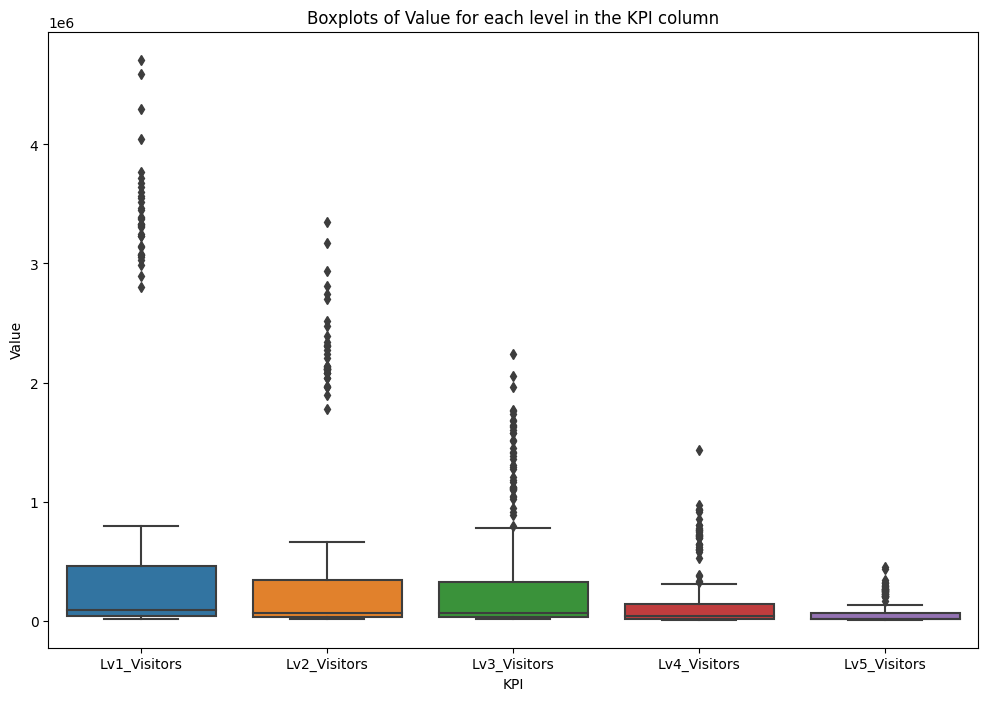

In [13]:
# Visualizing data distributions using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(x='KPI', y='Value', data=funnel)
plt.title('Boxplots of Value for each level in the KPI column')
plt.show()

**We can see there are values greater than maximum values for those columns, We can declare these values as outliers, There are approximately 224 values which are outliers according to numerical analysis. These points effect the model training and also predictions when we develop any ML models**

# Analytical Check for Outliers:

The analytical check involves calculating the Interquartile Range (IQR) and identifying values beyond 1.5 times the IQR as potential outliers. You can see the lower and upper bounds and the number of outliers identified.
# Visual Inspection with Boxplots:

The boxplots visually represent the distribution of the 'Value' variable for each level in the 'KPI' column. Outliers, if present, can be observed as individual points beyond the whiskers of the boxplots.
## Overall Understanding:

Analyzing both the analytical check and boxplots can provide insights into the presence of outliers and the distribution of the 'Value' variable. Outliers may indicate unusual or extreme values that could be further investigated for data quality or domain-specific considerations. The boxplots give a clear visual representation of the spread of values within each level of the 'KPI' column, helping to identify potential patterns or variations.

**4. Create a time-series visualization showing the value generated by each level of customer across the time. Share your inferences and explain your reasoning.**

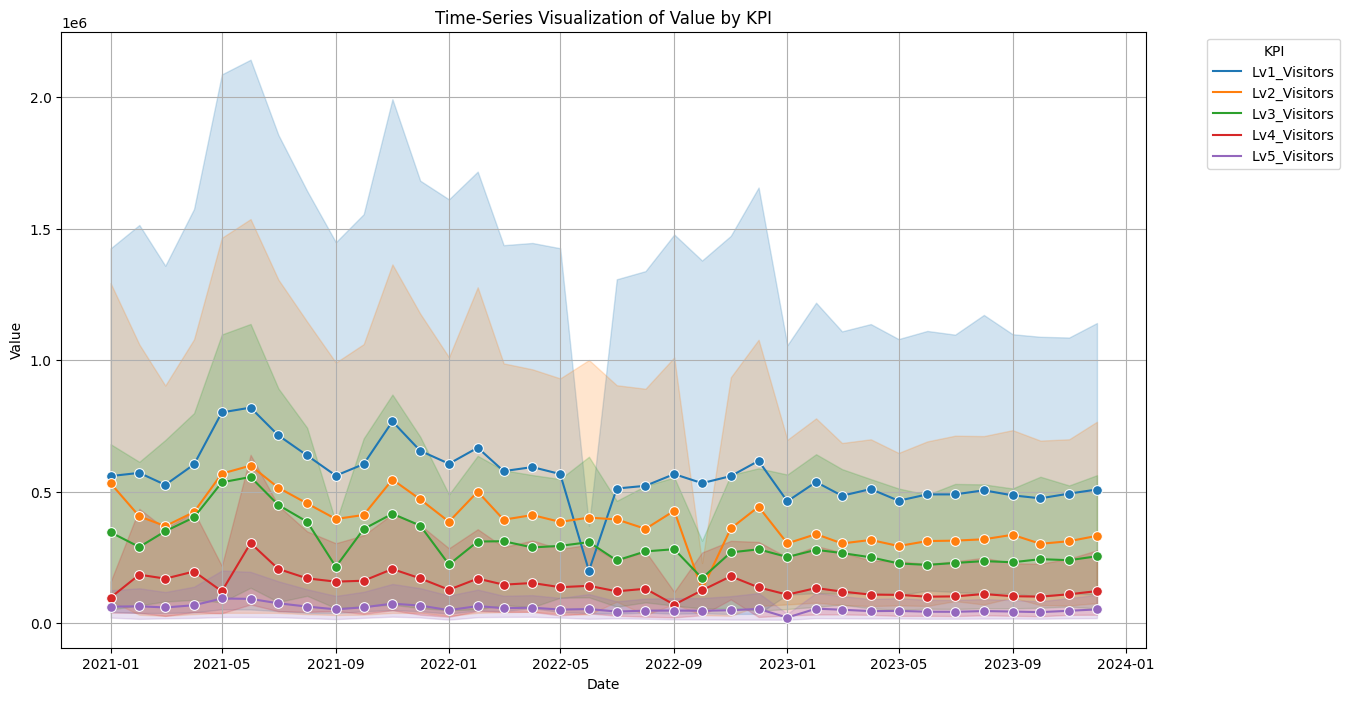

In [14]:
funnel['Date'] = pd.to_datetime(funnel['Year'].astype(str) + '-' + funnel['Month'].astype(str))
# Create a time-series visualization
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Value', hue='KPI', data=funnel, marker='o', markersize=7)
plt.title('Time-Series Visualization of Value by KPI')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='KPI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 1.1.2 - Prescriptive and Predictive Analysis

1. Create a new column called Conversion rate (defined as the ratio of level 5 customers to level 1 customers) and use this column for the following question <br>
(*Hint: Group by the rest of the categories and aggregate over the values column for each level. Then match the corresponding groups to get the conversion rates*):
 - Create a visualization to identify the spread of conversion rates across various groups of customers (by segment, region or both).
 - Identify the region which is having the best year-on-year growth.

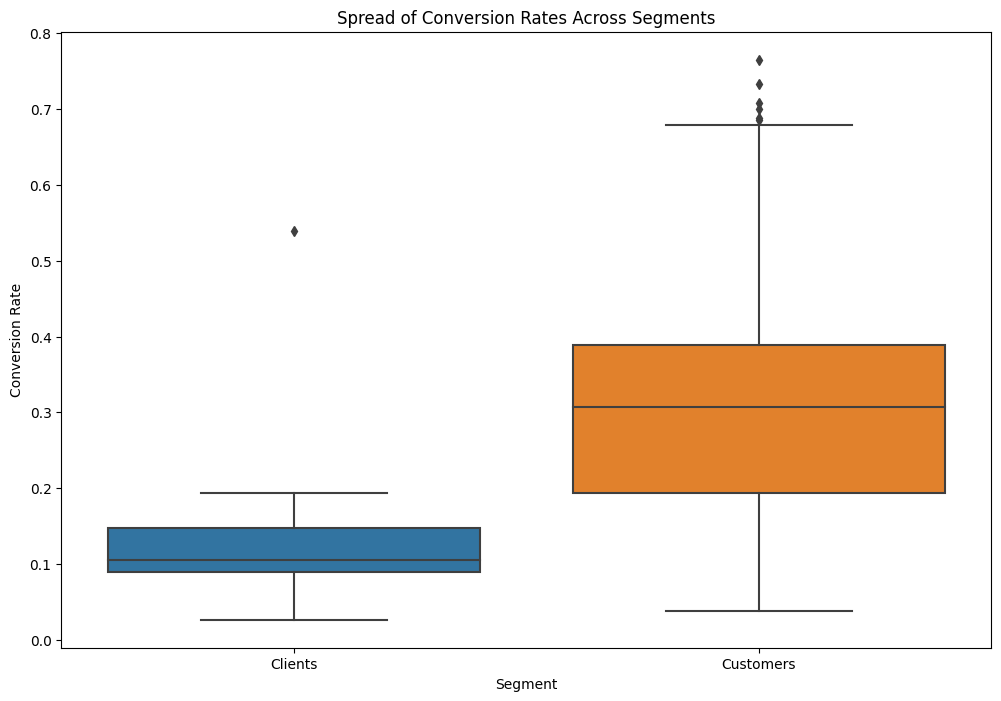

In [15]:
# Calculate the total values for Lv5_Visitors and Lv1_Visitors for each group
lv5_totals = funnel[funnel['KPI'] == 'Lv5_Visitors'].groupby(['Segment', 'City', 'Year', 'Month'])['Value'].sum().reset_index()
lv1_totals = funnel[funnel['KPI'] == 'Lv1_Visitors'].groupby(['Segment', 'City', 'Year', 'Month'])['Value'].sum().reset_index()

# Merge the totals based on the common columns
merged_totals = pd.merge(lv5_totals, lv1_totals, on=['Segment', 'City', 'Year', 'Month'], suffixes=('_Lv5', '_Lv1'))

# Calculate the Conversion Rate
merged_totals['Conversion Rate'] = merged_totals['Value_Lv5'] / merged_totals['Value_Lv1']

# Merge the Conversion Rate back to the original DataFrame
funnel = pd.merge(funnel, merged_totals[['Segment', 'City', 'Year', 'Month', 'Conversion Rate']], on=['Segment', 'City', 'Year', 'Month'], how='left')

# Group by relevant categories and calculate conversion rates
conversion_rates = funnel.groupby(['Segment', 'City', 'Year', 'Month']).agg({'Conversion Rate': 'mean'}).reset_index()

# Visualization of spread of conversion rates
plt.figure(figsize=(12, 8))
sns.boxplot(x='Segment', y='Conversion Rate', data=conversion_rates)
plt.title('Spread of Conversion Rates Across Segments')
plt.xlabel('Segment')
plt.ylabel('Conversion Rate')
plt.show()

In [16]:
# Identify the region with the best year-on-year growth
conversion_rates['Year'] = pd.to_datetime(conversion_rates['Year'], format='%Y')
conversion_rates['Year-Month'] = conversion_rates['Year'].dt.to_period('M')

# Calculate year-on-year growth by comparing the mean conversion rate of each year
yearly_growth = conversion_rates.groupby(['Segment', 'Year'])['Conversion Rate'].mean().pct_change()

# Identify the region with the best year-on-year growth
best_growth_region = yearly_growth.groupby('Segment').idxmax().reset_index()
best_growth_region = best_growth_region.set_index('Segment').apply(lambda x: x[1])  # Corrected line

print("Segment with the Best Year-on-Year Growth:", best_growth_region.to_dict())



Segment with the Best Year-on-Year Growth: {'Conversion Rate': {'Clients': 'Customers', 'Customers': Timestamp('2021-01-01 00:00:00')}}


In [17]:
# Identify the region with the best year-on-year growth
conversion_rates['Year'] = pd.to_datetime(conversion_rates['Year'], format='%Y')
conversion_rates['Year-Month'] = conversion_rates['Year'].dt.to_period('M')

# Calculate year-on-year growth by comparing the mean conversion rate of each year
yearly_growth = conversion_rates.groupby(['City', 'Year'])['Conversion Rate'].mean().pct_change()

# Identify the region with the best year-on-year growth
best_growth_region = yearly_growth.groupby('City').idxmax().reset_index()
best_growth_region = best_growth_region.set_index('City').apply(lambda x: x[1])  # Corrected line

print("Region with the Best Year-on-Year Growth:", best_growth_region.to_dict())

Region with the Best Year-on-Year Growth: {'Conversion Rate': {0: 'Jaipur', 1: Timestamp('2021-01-01 00:00:00')}}


2. Use time-series modelling (using Rolling averages and ARIMA) to predict the future values of "Level 5" customers for the next 3 months and plot them along with the actual values. The resulting plot may look something like the one shown below:

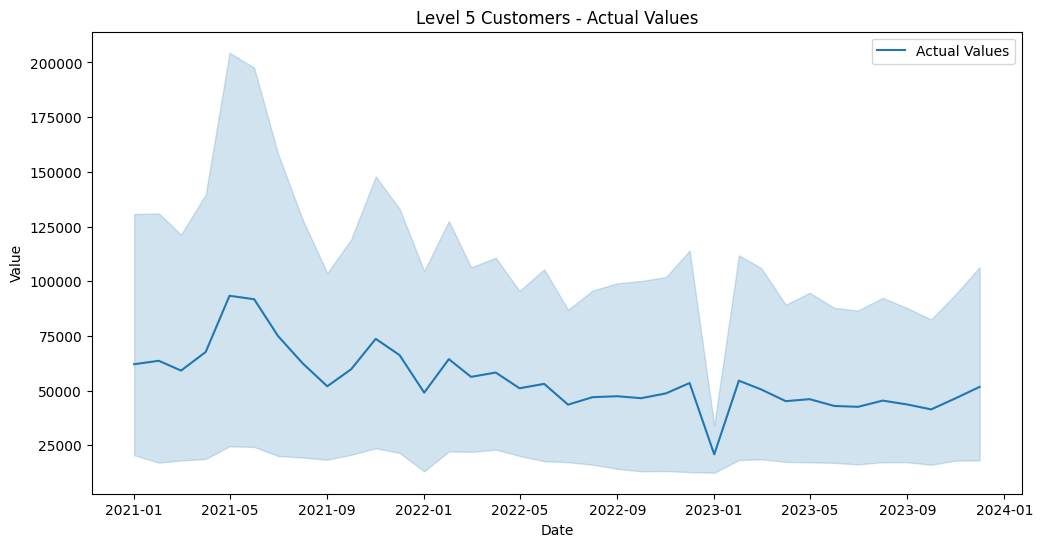

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named 'df'
# Replace 'Value' with the actual column name of your numerical measurement

# Ensure 'Year' and 'Month' are in datetime format
funnel['Date'] = pd.to_datetime(funnel['Year'].astype(str) + '-' + funnel['Month'].astype(str))
funnel.set_index('Date', inplace=True)

# Extract Level 5 customers data
level5_data = funnel[funnel['KPI'] == 'Lv5_Visitors']['Value']

# Plot the original time series data
plt.figure(figsize=(12, 6))
sns.lineplot(x=level5_data.index, y=level5_data, label='Actual Values')
plt.title('Level 5 Customers - Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



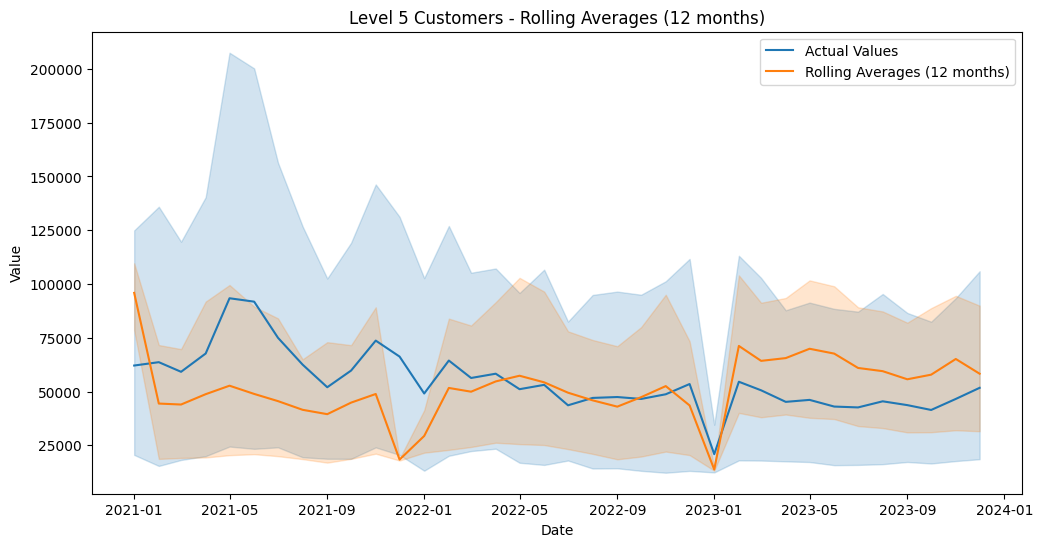

In [19]:
# Apply Rolling Averages
rolling_avg = level5_data.rolling(window=12).mean()

# Drop NaN values introduced by rolling averages
rolling_avg = rolling_avg.dropna()

# Plot Rolling Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x=level5_data.index, y=level5_data, label='Actual Values')
sns.lineplot(x=rolling_avg.index, y=rolling_avg, label='Rolling Averages (12 months)')
plt.title('Level 5 Customers - Rolling Averages (12 months)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

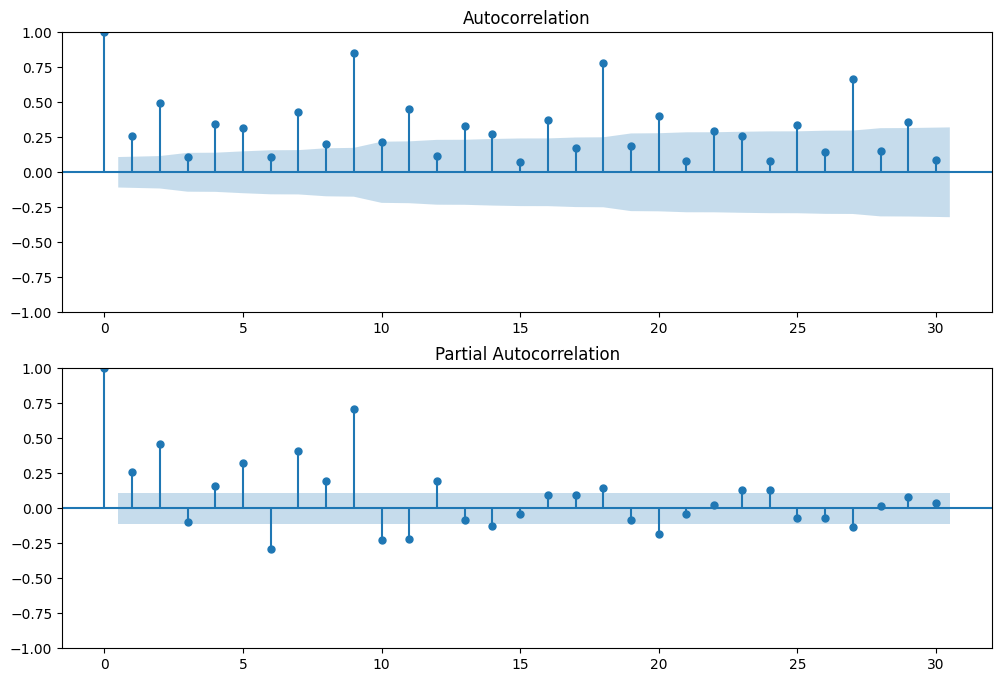

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

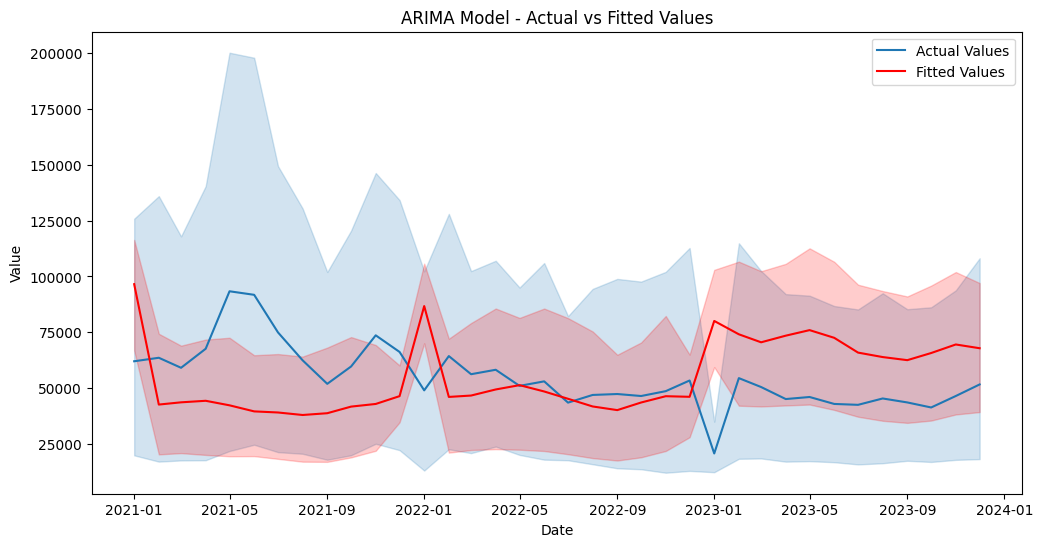

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Ensure 'Year' and 'Month' are in datetime format
funnel['Date'] = pd.to_datetime(funnel['Year'].astype(str) + '-' + funnel['Month'].astype(str))
funnel.set_index('Date', inplace=True)

# Extract Level 5 customers data
level5_data = funnel[funnel['KPI'] == 'Lv5_Visitors']['Value']

# Plot the autocorrelation and partial autocorrelation functions to determine ARIMA parameters
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(level5_data, lags=30, ax=ax1)
plot_pacf(level5_data, lags=30, ax=ax2)
plt.show()

# ARIMA Modeling
# Assuming stationarity (you may need to apply differencing to achieve stationarity)
order = (1, 1, 1)  # Adjust order based on the ACF and PACF plots
model = ARIMA(level5_data, order=order)
results = model.fit()

# Plot the original time series data and the fitted values
plt.figure(figsize=(12, 6))
sns.lineplot(x=level5_data.index, y=level5_data, label='Actual Values')
sns.lineplot(x=results.fittedvalues.index, y=results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model - Actual vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()




# 1.2 A/B Testing

**Answer the following questions in under 120 words:**

**1. What should be the primary metric to perform the A/B test? Is "number of people clicking the button" a sufficient metric to analyze the test and meet our business objective? Define a derived metric to help you analyze the data and get results, use A/B testing metrics for reference.**

Ans. While the "number of people clicking the button" is an important metric, it is insufficient to meet the business goal of increasing conversions and revenue. A more meaningful derived metric would be the "conversion rate," which is calculated as the number of users who click the button and then complete the payment process. This metric directly measures the effectiveness of the A/B test in achieving the ultimate goal of revenue generation. Analysing conversion rates enables a more accurate assessment of the impact on user behaviour and the website's success in meeting its business objectives.

**2. Clearly state the null and the alternate hypothesis for the above mentioned A/B test.**

Ans. Null Hypothesis (H0): The A/B test does not have a significant impact on the conversion rate; any observed differences in conversion rates are due to random chance.

Alternate Hypothesis (H1): The A/B test has a significant impact on the conversion rate, demonstrating a measurable and meaningful difference between the control and experimental groups. The observed variations in conversion rates are not solely attributable to chance, indicating a successful influence on user behavior and increased likelihood of payment for services.

### 1.2.1 - EDA
Import data from the `AB_Test` sheet of the `AssignmentData.xlsx` file into a dataframe named `abtest` and perform exploratory analysis.

**Question:**

Create a timeseries visualization with Date (on x-axis) and total number of clicks (on y-axis) for each device type creating separate trendlines for each device.
- Which device performed best in terms of total number of clicks.
- Is there a best day/period where the performance is better on average?

In [21]:
import pandas as pd

file_path = '/content/gdrive/MyDrive/Fittlyf/AssignmentData.xlsx'
sheet_name = 'AB_Test'

# Read the Funnel sheet into a pandas DataFrame named funnel
abtest = pd.read_excel(file_path, sheet_name=sheet_name)
print(abtest)

            Date  Device                                            Address  \
0     2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/c...   
1     2023-05-18  Laptop              fyttlyf/business/campaign/get-paid///   
2     2023-05-18  Mobile  fyttlyf/business/campaign/campaigns-business/s...   
3     2023-05-18  Laptop  fyttlyf/business/product/business-financial-se...   
4     2023-05-18  Laptop  fyttlyf/business/product/business-accept-payme...   
...          ...     ...                                                ...   
18094 2023-05-17  Tablet    fyttlyf/personal/campaign/weekoneoffer-terms///   
18095 2023-05-17  Mobile           fyttlyf/personal//send-money-to-india///   
18096 2023-05-17  Laptop           fyttlyf/personal/buy/fyttlyf-benefits///   
18097 2023-05-17  Tablet  fyttlyf/enterprise/product/enterprise-pay-late...   
18098 2023-05-17  Laptop  fyttlyf/business/product/business-operations/r...   

       Clicks  Visitors       Group  
0         159

# Performing Exploratory Analysis

In [22]:
abtest.shape

(18099, 6)

In [23]:
abtest.columns

Index(['Date', 'Device', 'Address', 'Clicks', 'Visitors', 'Group'], dtype='object')

In [24]:
abtest['Device'].value_counts()

Mobile    6330
Laptop    6181
Other     3687
Tablet    1901
Name: Device, dtype: int64

In [25]:
abtest['Address'].value_counts()

fyttlyf/business/campaign/campaigns-business/contact///                      143
fyttlyf/both/product/digital-wallet-mobile-apps///                           143
fyttlyf/personal//ct///                                                      142
fyttlyf/personal/product/digital-wallet-ways-to-pay///                       142
fyttlyf///about-payment-methods///                                           141
                                                                            ... 
fyttlyf/personal/buy/security-safety///                                        2
fyttlyf/business//solution-providers///                                        2
fyttlyf/personal/product/digital-wallet-ways-to-pay/add-payment-method///      2
fyttlyf/personal/product/digital-wallet-send-receive-money/fyttlyf-me///       1
fyttlyf/personal/product/digital-wallet-ways-to-pay/buy-now-pay-later///       1
Name: Address, Length: 211, dtype: int64

In [26]:
abtest['Group'].value_counts()

Control       10547
Experiment     7552
Name: Group, dtype: int64

In [27]:
abtest.describe().style.background_gradient(cmap='copper')

,Clicks,Visitors
count,18099.000000,18099.000000
mean,62.600033,495.485441
std,377.536611,5704.920360
min,0.000000,0.000000
25%,6.000000,21.000000
50%,11.000000,33.000000
75%,20.000000,97.000000
max,11199.000000,211868.000000


In [28]:
abtest.describe(include='object')

,Device,Address,Group
count,18099,18099,18099
unique,4,211,2
top,Mobile,fyttlyf/business/campaign/campaigns-business/c...,Control
freq,6330,143,10547


In [29]:
abtest.isnull().sum()

Date        0
Device      0
Address     0
Clicks      0
Visitors    0
Group       0
dtype: int64

**No Null Values in the abtest dataset**

**Identifying Correlation**

<Axes: >

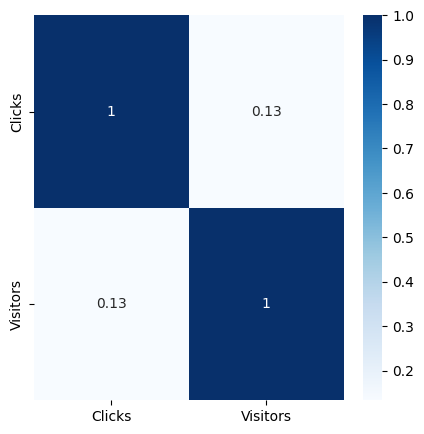

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(abtest.corr(),cbar=True,annot=True,cmap='Blues')

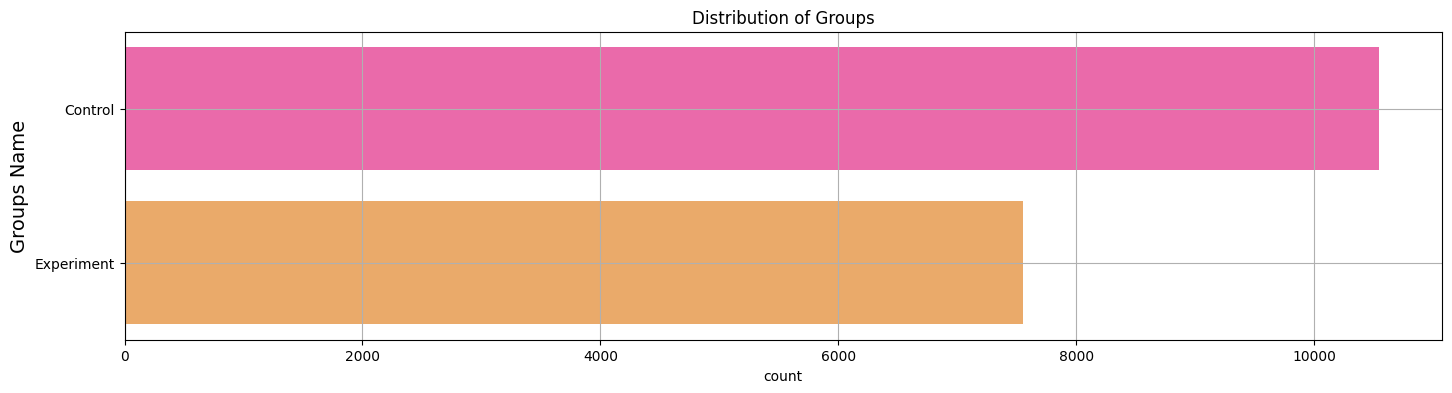

In [31]:
plt.rcParams['figure.figsize'] = (17,4)
sns.countplot(y = abtest['Group'], palette='spring', orient='v')
plt.ylabel('Groups Name', fontsize=14)
plt.title('Distribution of Groups')
plt.grid()
plt.show()

**Time series Visualization of Date and Clicks for each device**

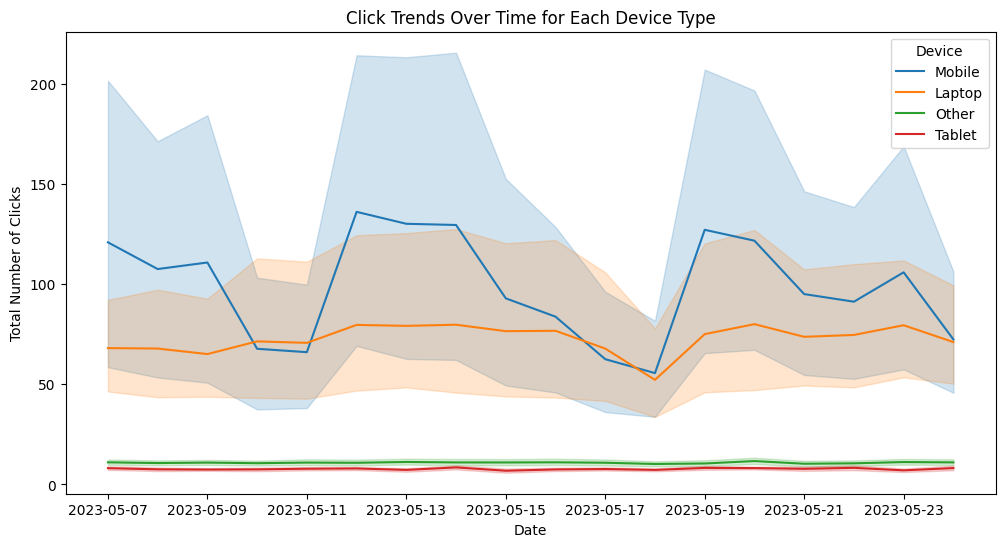

In [32]:
abtest['Date'] = pd.to_datetime(abtest['Date'])

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Clicks', hue='Device', data=abtest)
plt.title('Click Trends Over Time for Each Device Type')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')
plt.show()

**Find the device with the highest total clicks**

In [33]:
# Calculate total clicks for each device
total_clicks_per_device = abtest.groupby('Device')['Clicks'].sum().reset_index()

best_performing_device = total_clicks_per_device.loc[total_clicks_per_device['Clicks'].idxmax(), 'Device']

print(f"The best-performing device is: {best_performing_device}")


The best-performing device is: Mobile


**Find the date with the highest average clicks**

In [34]:
# Calculate average clicks per day
average_clicks_per_day = abtest.groupby('Date')['Clicks'].mean()

best_day = average_clicks_per_day.idxmax()

print(f"The best date in terms of average clicks is: {best_day}")


The best date in terms of average clicks is: 2023-05-14 00:00:00


1. Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%, do we have sufficient sample size to conclude the test?

  What is the sample size required for the test?(Use this article to supplement your understanding - [Sample Size in A/B Testing](https://guessthetest.com/calculating-sample-size-in-a-b-testing-everything-you-need-to-know/))


Ans. We have the values of the significance level (α=0.05) and the power (1−β=0.8), which are common choices for hypothesis testing. We have the value of the minimum detectable effect (MDE = 0.03), which is the smallest difference between the conversion rates that you want to detect. This value can be used to calculate the difference between the population means (μ1​−μ2​=0.03).
However, you have not given the value of the standard deviation (σ), which is a measure of the variability of the conversion rates. This value can vary depending on the type of web page or app and the population. We can use a conservative or worst-case scenario value, such as the largest possible standard deviation for our conversion rates.

For example, if our conversion rates are proportions or percentages, the largest possible standard deviation is 0.5, which occurs when the proportion is 0.5. If conversion rates are continuous and bounded by a certain range, the largest possible standard deviation is one-fourth of the range, which occurs when the data are uniformly distributed. If conversion rates are continuous and unbounded, We may need to use some other methods to estimate the standard deviation, such as using a confidence interval or a bootstrap technique.

Let’s assume that your conversion rates are proportions and that the standard deviation is 0.5. Then, using the formula and the values that We have, we can calculate the sample size and it as 1845. This means that We need at least 1845 visitors in each group to conduct the A/B test with the desired significance level, power, and effect size. So our present sample size is not sufficient to conclude the test


2. Write a function that accepts relevant inputs to test your hypothesis at the assumed level of statistical significance. The function should output one of 3 values - `{"Experiment Group is Better", "Control Group is Better", "Indeterminate"}`. Use it to check whether you reached a statistically significant conclusion at 95% confidence level? Can the experiment be concluded?


In [35]:
from scipy.stats import ttest_ind

def hypothesis_test(data, alpha=0.05):

    experiment_group = data[data['Group'] == 'Experiment']['Clicks']
    control_group = data[data['Group'] == 'Control']['Clicks']

    # Perform t-test
    t_stat, p_value = ttest_ind(experiment_group, control_group, equal_var=False)

    # Determine conclusion based on p-value
    if p_value < alpha:
        return "Experiment Group is Better"
    elif p_value > 1 - alpha:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# Example usage:
# Assuming your data is in a DataFrame named 'df'
result = hypothesis_test(abtest)

# Display the conclusion
print(result)


Experiment Group is Better


3. Create a Powerpoint Presentation where you would have slides around the following points:
  - What is the Business case?
  - Trends of total clicks for different devices.
  - What are the hypotheses?
  - What is the sample size required based on our assumptions
  - Summary of test results.

  **Make sure your slides look professional.**
  

[PPT for Question3](https://docs.google.com/presentation/d/17VB0pENYbbhYT-bfxTSQFb7ab4jrQcZd/edit?usp=sharing&ouid=116655993454462647793&rtpof=true&sd=true)

---
# Section 2 - Generative AI


## 2.1 - Building a Chatbot (Flowchart)

Create a flowchart using **Powerpoint** or **MIRO Board** to visualize the steps involved in building a chatbot for a business using NLP. Create another flowchart to compare it with the process of building one using Generative AI.

- Screenshot the flowcharts and paste them in the text  box below. For this you will need to convert the screenshot PNG to URI, copy the text and paste it here for the markdown to display it as an image. (Use this image to URI converter - [link here](https://onlinepngtools.com/convert-png-to-data-uri))

[Flow Chart For building Chatbot using NLP](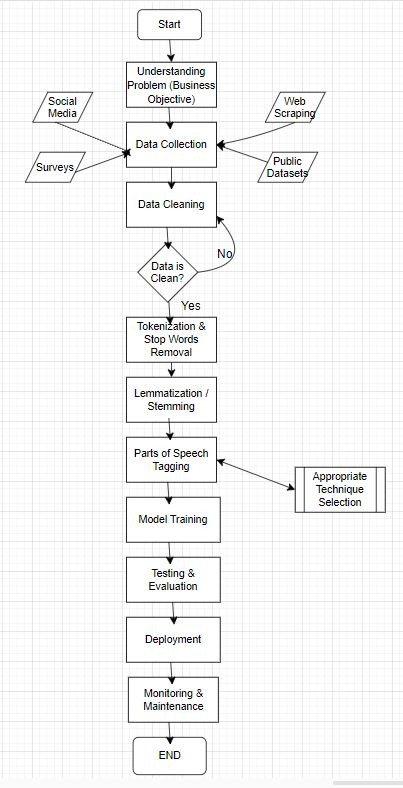)

[Flow Chart For building Chatbot using GenAI text](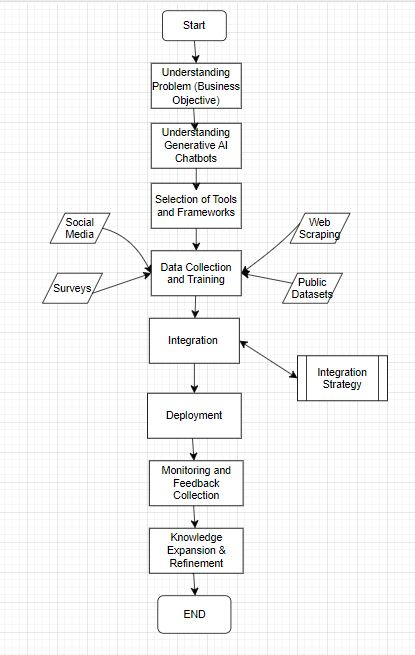)

## 2.2 - Fine-Tuning an LLM

**Question:** Give context and summarize the process of fine tuning the LLM in short (100 words). Also create a flowchart to easily explain the process. Use only the knowledge from the video.

**Ans:** To fine-tune LLM, we first need to start with a pre-trained LLM. A sentence_transformer, which provides access to various LLMs, is used in the video. Load the task-specific data and pre-process the data. Create a pipeline and a fine-tuned LLM with the help of the pipeline. Now Define the prompt template that could be helpful in model training. For prompt semantic connection, form chains. The model will now be trained on a specified dataset and fine-tuned LLM to adapt its parameters.

[Fine-Tune LLM](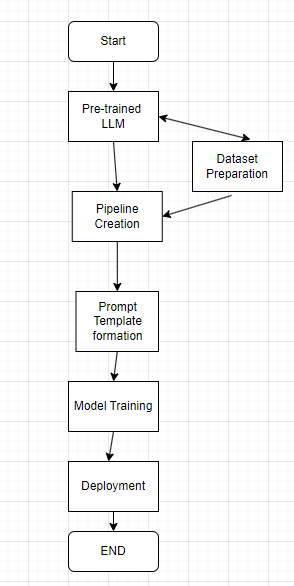)